In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_path = '../DF/berkeley_processed.csv'
df = pd.read_csv(data_path)

print('Dataset carregado com sucesso. Dimensões:', df.shape)

Dataset carregado com sucesso. Dimensões: (12763, 8)


In [6]:
print('Estatísticas descritivas:')
print(df.describe())

Estatísticas descritivas:
          Year   Decade  Popular_Major  Admission_Binary
count  12763.0  12763.0   12763.000000      12763.000000
mean    1973.0   1970.0       0.620857          0.409935
std        0.0      0.0       0.485193          0.491841
min     1973.0   1970.0       0.000000          0.000000
25%     1973.0   1970.0       0.000000          0.000000
50%     1973.0   1970.0       1.000000          0.000000
75%     1973.0   1970.0       1.000000          1.000000
max     1973.0   1970.0       1.000000          1.000000


Frequência da coluna Major:
Major
Other    7924
A        1246
C         918
D         792
F         714
B         585
E         584
Name: count, dtype: int64


/tmp/ipykernel_62627/76877821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


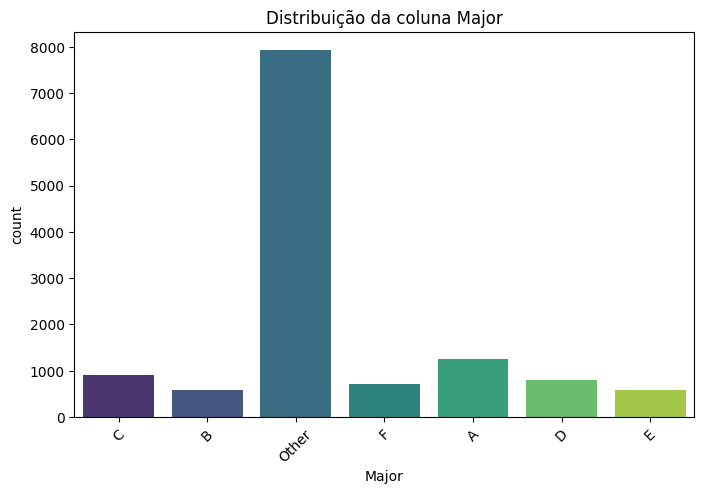

Frequência da coluna Gender:
Gender
M    8442
F    4321
Name: count, dtype: int64


/tmp/ipykernel_62627/76877821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


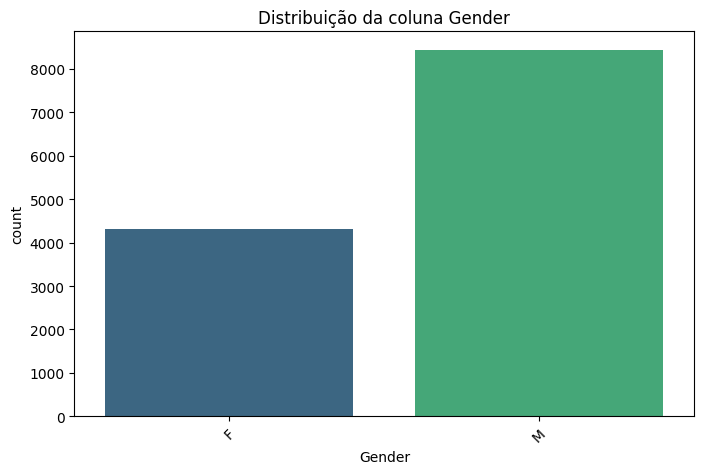

Frequência da coluna Admission:
Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64


/tmp/ipykernel_62627/76877821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


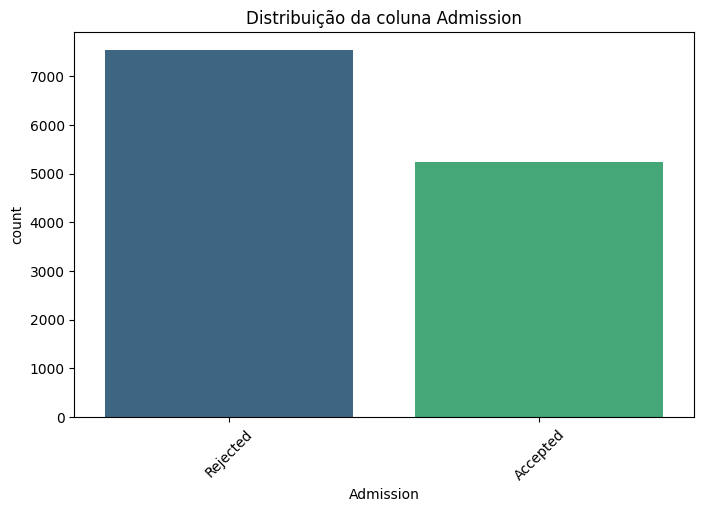

Frequência da coluna Gender_Admission:
Gender_Admission
M_Rejected    4704
M_Accepted    3738
F_Rejected    2827
F_Accepted    1494
Name: count, dtype: int64


/tmp/ipykernel_62627/76877821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


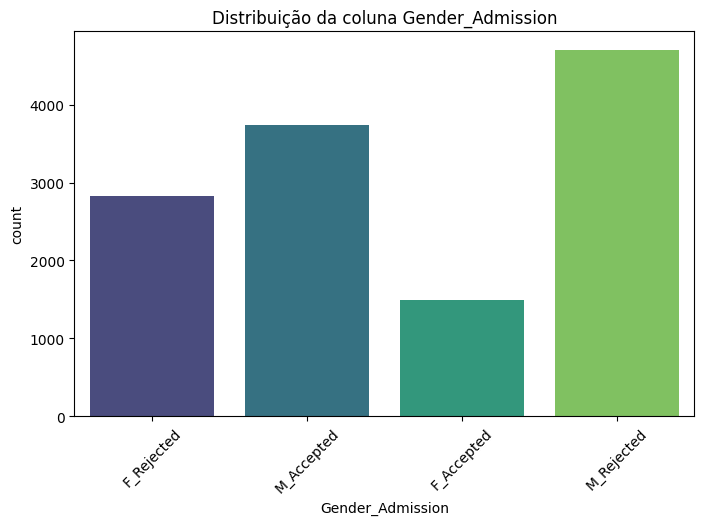

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f'Frequência da coluna {col}:')
    print(df[col].value_counts())
 
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribuição da coluna {col}')
    plt.xticks(rotation=45)
    plt.show()

In [13]:
representatividade = df.groupby(['Major', 'Gender'])[['Admission_Binary']].sum()

print('\nRepresentatividade por gênero e major:')
print(representatividade)



Representatividade por gênero e major:
              Admission_Binary
Major Gender                  
A     F                     89
      M                    825
B     F                     17
      M                    353
C     F                    201
      M                    120
D     F                    131
      M                    138
E     F                     94
      M                     53
F     F                     25
      M                     22
Other F                    937
      M                   2227


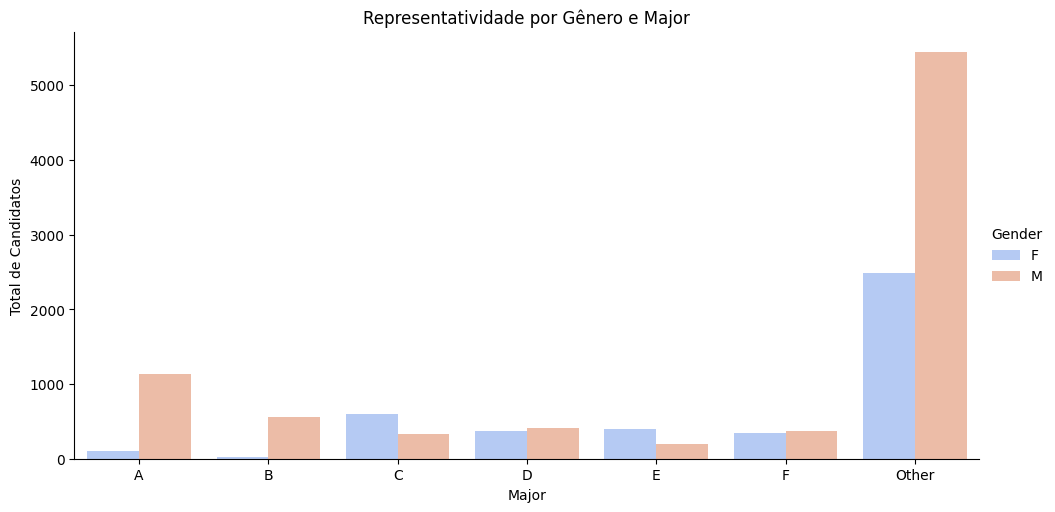

In [15]:
representatividade = df.groupby(['Major', 'Gender'])['Admission_Binary'].sum().reset_index()
representatividade['Total'] = df.groupby(['Major', 'Gender']).size().values

sns.catplot(
    data=representatividade, kind='bar',
    x='Major', y='Total', hue='Gender', palette='coolwarm', height=5, aspect=2
)
plt.title('Representatividade por Gênero e Major')
plt.xlabel('Major')
plt.ylabel('Total de Candidatos')
plt.show()

In [16]:
total_applicants = representatividade.groupby('Gender')['Total'].sum()
print('\nTotal de candidatos por gênero:')
print(total_applicants)


Total de candidatos por gênero:
Gender
F    4321
M    8442
Name: Total, dtype: int64


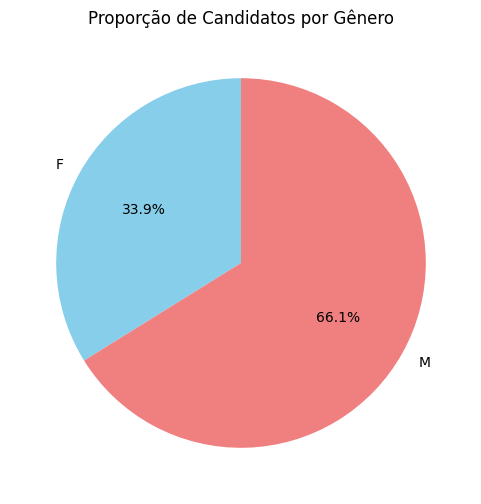

In [17]:
plt.figure(figsize=(6, 6))
total_applicants.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporção de Candidatos por Gênero')
plt.ylabel('')
plt.show()

In [18]:
admission_rates = df.groupby(['Major', 'Gender'])['Admission_Binary'].mean().reset_index()
print('\nTaxas de admissão por major e gênero:')
print(admission_rates)


Taxas de admissão por major e gênero:
    Major Gender  Admission_Binary
0       A      F          0.824074
1       A      M          0.724956
2       B      F          0.680000
3       B      M          0.630357
4       C      F          0.338954
5       C      M          0.369231
6       D      F          0.349333
7       D      M          0.330935
8       E      F          0.239186
9       E      M          0.277487
10      F      F          0.073314
11      F      M          0.058981
12  Other      F          0.376911
13  Other      M          0.409526


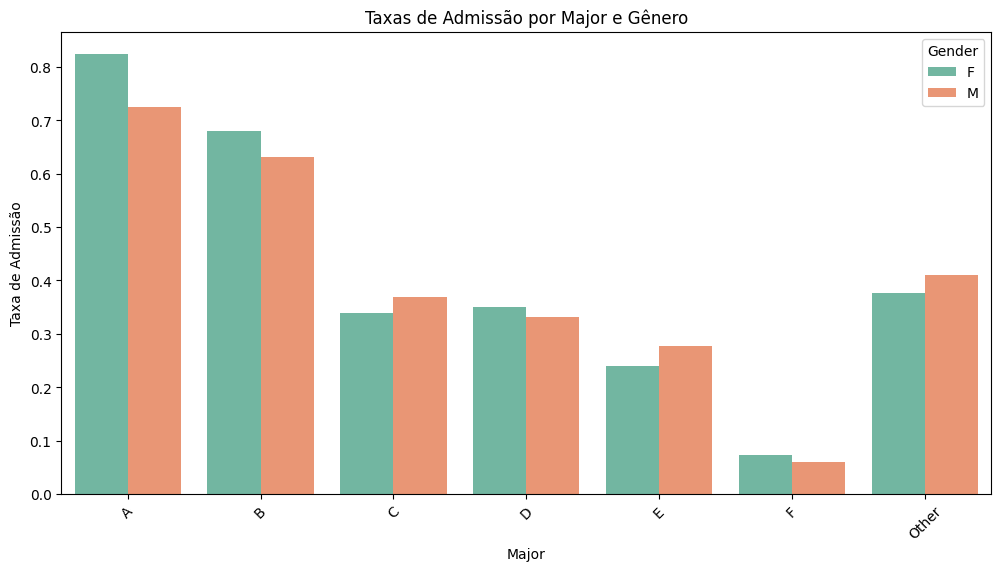

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=admission_rates, x='Major', y='Admission_Binary', hue='Gender', palette='Set2')
plt.title('Taxas de Admissão por Major e Gênero')
plt.ylabel('Taxa de Admissão')
plt.xlabel('Major')
plt.xticks(rotation=45)
plt.show()

In [20]:
agg_admission_rate = df.groupby('Gender')['Admission_Binary'].mean()
major_admission_rate = df.groupby('Major')['Admission_Binary'].mean()
print('\nTaxas de admissão agregadas por gênero:')
print(agg_admission_rate)
print('\nTaxas de admissão por major:')
print(major_admission_rate)


Taxas de admissão agregadas por gênero:
Gender
F    0.345753
M    0.442786
Name: Admission_Binary, dtype: float64

Taxas de admissão por major:
Major
A        0.733547
B        0.632479
C        0.349673
D        0.339646
E        0.251712
F        0.065826
Other    0.399293
Name: Admission_Binary, dtype: float64


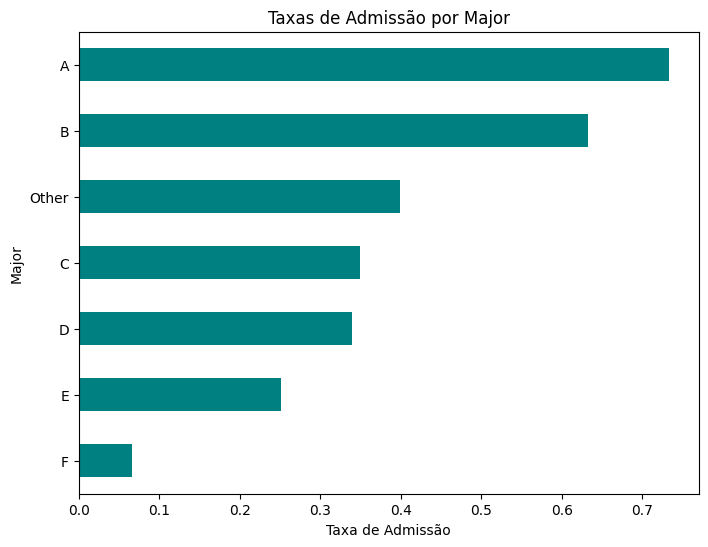

In [21]:
plt.figure(figsize=(8, 6))
major_admission_rate.sort_values().plot(kind='barh', color='teal')
plt.title('Taxas de Admissão por Major')
plt.xlabel('Taxa de Admissão')
plt.ylabel('Major')
plt.show()


In [22]:
candidatos_taxas = df.groupby(['Major', 'Gender'])[['Admission_Binary']].mean()
print('\nRelação candidatos x taxas de admissão:')
print(candidatos_taxas)


Relação candidatos x taxas de admissão:
              Admission_Binary
Major Gender                  
A     F               0.824074
      M               0.724956
B     F               0.680000
      M               0.630357
C     F               0.338954
      M               0.369231
D     F               0.349333
      M               0.330935
E     F               0.239186
      M               0.277487
F     F               0.073314
      M               0.058981
Other F               0.376911
      M               0.409526


In [23]:
print('\nMajors mais e menos competitivos:')
print(major_admission_rate.sort_values())


Majors mais e menos competitivos:
Major
F        0.065826
E        0.251712
D        0.339646
C        0.349673
Other    0.399293
B        0.632479
A        0.733547
Name: Admission_Binary, dtype: float64


In [24]:
gender_proportion = representatividade.groupby('Major')['Admission_Binary'].sum() / representatividade['Total'].sum()
print('\nProporções de inscrições por gênero:')
print(gender_proportion)


Proporções de inscrições por gênero:
Major
A        0.071613
B        0.028990
C        0.025151
D        0.021077
E        0.011518
F        0.003683
Other    0.247904
Name: Admission_Binary, dtype: float64


In [25]:
general_admission_rate = df['Admission_Binary'].mean()
print('\nTaxa geral de admissão:', general_admission_rate)
print('\nComparação com taxas por major:')
print(major_admission_rate)


Taxa geral de admissão: 0.4099349682676487

Comparação com taxas por major:
Major
A        0.733547
B        0.632479
C        0.349673
D        0.339646
E        0.251712
F        0.065826
Other    0.399293
Name: Admission_Binary, dtype: float64


In [26]:
preference_by_gender = df.groupby(['Gender', 'Major'])['Admission_Binary'].sum()
print('\nPreferências de majors por gênero:')
print(preference_by_gender)


Preferências de majors por gênero:
Gender  Major
F       A          89
        B          17
        C         201
        D         131
        E          94
        F          25
        Other     937
M       A         825
        B         353
        C         120
        D         138
        E          53
        F          22
        Other    2227
Name: Admission_Binary, dtype: int64
